# Naive Bayes Modeling - Sentiment Analysis (Updated Dataset)

## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import SMOTE

## 2. Load Dataset

In [2]:
df = pd.read_csv('product_review_cleaned.csv')
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,2,worst experience ever!,not working properly,neutral
1,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive
2,limraz furniture Engineered Wood Computer Desk...,1298,5,classy product,it is perfect if you want to work on the compu...,positive
3,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,simply awesome,thanks flipkart,positive
4,KENT Aura Portable Room Air PurifierPink,6999,5,simply awesome,thanks product looks good not sure if any inst...,positive


## 3. Eksplorasi Data

In [3]:
df.info()
df['Sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   131 non-null    object
 1   product_price  131 non-null    int64 
 2   Rate           131 non-null    int64 
 3   Review         131 non-null    object
 4   Summary        131 non-null    object
 5   Sentiment      131 non-null    object
dtypes: int64(2), object(4)
memory usage: 6.3+ KB


Sentiment
positive    104
negative     20
neutral       7
Name: count, dtype: int64

## 4. Encode Label Sentiment

In [4]:
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])  # mapping: {neutral:0, negative:1, positive:2} (urutan bisa berbeda)
df['Sentiment'].value_counts()

Sentiment
2    104
0     20
1      7
Name: count, dtype: int64

## 5. TF-IDF pada Kolom Review

In [5]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(df['Review'])  # Menggunakan kolom Review sebagai fitur
y = df['Sentiment']

## 6. Penyeimbangan Data (Jika Perlu)

In [6]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_tfidf, y)

## 7. Split Data untuk Pelatihan dan Pengujian

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

## 8. Latih Model Naive Bayes

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## 9. Evaluasi Model

Accuracy: 0.8571428571428571
F1 Score (macro): 0.8427272727272728
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      1.00      0.96        24
     neutral       0.72      0.95      0.82        19
    positive       1.00      0.60      0.75        20

    accuracy                           0.86        63
   macro avg       0.88      0.85      0.84        63
weighted avg       0.89      0.86      0.85        63



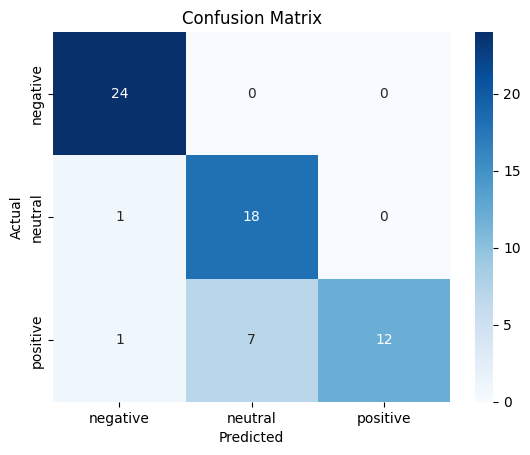

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
joblib.dump(model, 'naive_bayes_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')

NameError: name 'joblib' is not defined